In [1]:
from fastkaggle import *
from fastai.vision.all import *

import pandas as pd

set_seed(42)

In [2]:
comp = 'paddy-disease-classification'
path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

In [3]:
trn_path = path/'train_images'
files = get_image_files(trn_path)

(480, 640)


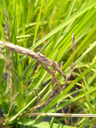

In [4]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [5]:
from fastcore.parallel import *

def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(480, 640)    10403
(640, 480)        4
dtype: int64

In [6]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
    item_tfms=Resize(480, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75))

dls.show_batch(max_n=6)

/Users/florianstracke/miniconda3m1/envs/dl/lib/python3.8/site-packages/torch/_tensor.py:1121: UserWarning: The operator 'aten::linalg_solve' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  ret = func(*args, **kwargs)


Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


_LinAlgError: linalg.solve: (Batch element 0): The diagonal element 2 is zero, the solve could not be completed because the input matrix is singular.

In [ ]:
learn = vision_learner(dls, 'resnet26d', metrics=error_rate, path='.').to_fp16()